<a href="https://colab.research.google.com/github/Medasimone/Files/blob/main/Binary_classification_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import your libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from time import time
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
pip install kaggle

In [ ]:
# prompt: give me a code to import this data https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yasserh/breast-cancer-dataset
!unzip breast-cancer-dataset.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
License(s): CC0-1.0
breast-cancer-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-cancer-dataset.zip
replace breast-cancer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

df = pd.read_csv('breast-cancer.csv')
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [ ]:
#https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [ ]:
# Display the first few rows of the dataset
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# prompt: i like to remove id column

df = df.drop('id', axis=1)


In [ ]:
df.nunique()


,0
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


In [ ]:

# Encode the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


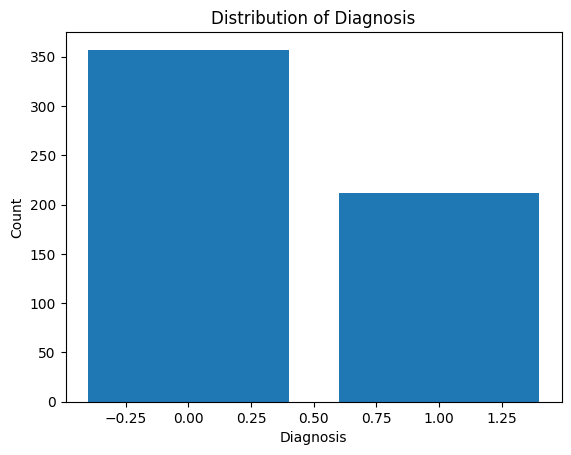

In [ ]:
# prompt: graphic the diagnosis to see how many of each

import matplotlib.pyplot as plt

# Count the occurrences of each diagnosis
diagnosis_counts = df['diagnosis'].value_counts()

# Create a bar plot
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()


In [ ]:
# Split the data into X (features) and y (target)
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)


In [ ]:
# Split into Train/Test
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the numeric data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
# This is the actual algo harness that will allow you to run a loop and call many algos at once
# this is obviously for binary classification only
models = []
#models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SGD', SGDClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NearestCentroid', NearestCentroid()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ExtraTree', ExtraTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BNB', BernoulliNB()))
# models.append(('SVM', SVC(gamma='auto')))
# models.append(('NuSVC', NuSVC()))
models.append(('LinearSVC', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))
models.append(('BinaryClassificationModel', LogisticRegression(solver='liblinear')))

In [ ]:
# Scoring metrics:
# 'accuracy', 'balanced_accuracy', 'average_precision', 'neg_brier_score', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted',
# 'neg_log_loss', 'precision', 'recall', 'jaccard', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted'

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time() - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Score for each of the 10 K-fold tests: ", cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print()

SGD: 0.839614 (0.104361)
Score for each of the 10 K-fold tests:  [0.84782609 0.89130435 0.93478261 0.86956522 0.63043478 0.91111111
 0.93333333 0.75555556 0.93333333 0.68888889]
SGDClassifier()
	Training time: 0.005s
	Prediction time: 0.061s

Ridge: 0.951739 (0.032324)
Score for each of the 10 K-fold tests:  [0.91304348 0.97826087 0.93478261 0.93478261 0.95652174 0.97777778
 0.97777778 0.88888889 1.         0.95555556]
RidgeClassifier()
	Training time: 0.004s
	Prediction time: 0.082s

PAC: 0.885749 (0.058119)
Score for each of the 10 K-fold tests:  [0.82608696 0.91304348 0.82608696 0.91304348 0.93478261 0.91111111
 0.93333333 0.75555556 0.91111111 0.93333333]
PassiveAggressiveClassifier()
	Training time: 0.004s
	Prediction time: 0.075s

Perceptron: 0.863623 (0.053895)
Score for each of the 10 K-fold tests:  [0.84782609 0.95652174 0.84782609 0.91304348 0.80434783 0.84444444
 0.88888889 0.8        0.8        0.93333333]
Perceptron()
	Training time: 0.004s
	Prediction time: 0.069s

LDA: 0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppr

LinearSVC: 0.883865 (0.097321)
Score for each of the 10 K-fold tests:  [0.84782609 0.95652174 0.91304348 0.63043478 0.91304348 0.93333333
 0.95555556 0.8        0.93333333 0.95555556]
LinearSVC()
	Training time: 0.038s
	Prediction time: 0.373s

RF: 0.964734 (0.033121)
Score for each of the 10 K-fold tests:  [0.95652174 1.         0.93478261 0.97826087 1.         0.97777778
 0.95555556 0.88888889 0.95555556 1.        ]
RandomForestClassifier()
	Training time: 0.228s
	Prediction time: 2.976s

GB: 0.951787 (0.041031)
Score for each of the 10 K-fold tests:  [0.95652174 1.         0.84782609 0.95652174 0.93478261 0.97777778
 0.95555556 0.93333333 0.95555556 1.        ]
GradientBoostingClassifier()
	Training time: 0.760s
	Prediction time: 8.611s

ExtraTrees: 0.960435 (0.032375)
Score for each of the 10 K-fold tests:  [0.97826087 1.         0.91304348 0.95652174 0.95652174 0.97777778
 0.97777778 0.88888889 0.97777778 0.97777778]
ExtraTreesClassifier()
	Training time: 0.104s
	Prediction time: 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: 0.969372 (0.031065)
Score for each of the 10 K-fold tests:  [0.95652174 1.         0.89130435 0.95652174 0.97826087 0.97777778
 0.97777778 1.         0.95555556 1.        ]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
	Training time: 0.145s
	Prediction time: 2.849s

Binary

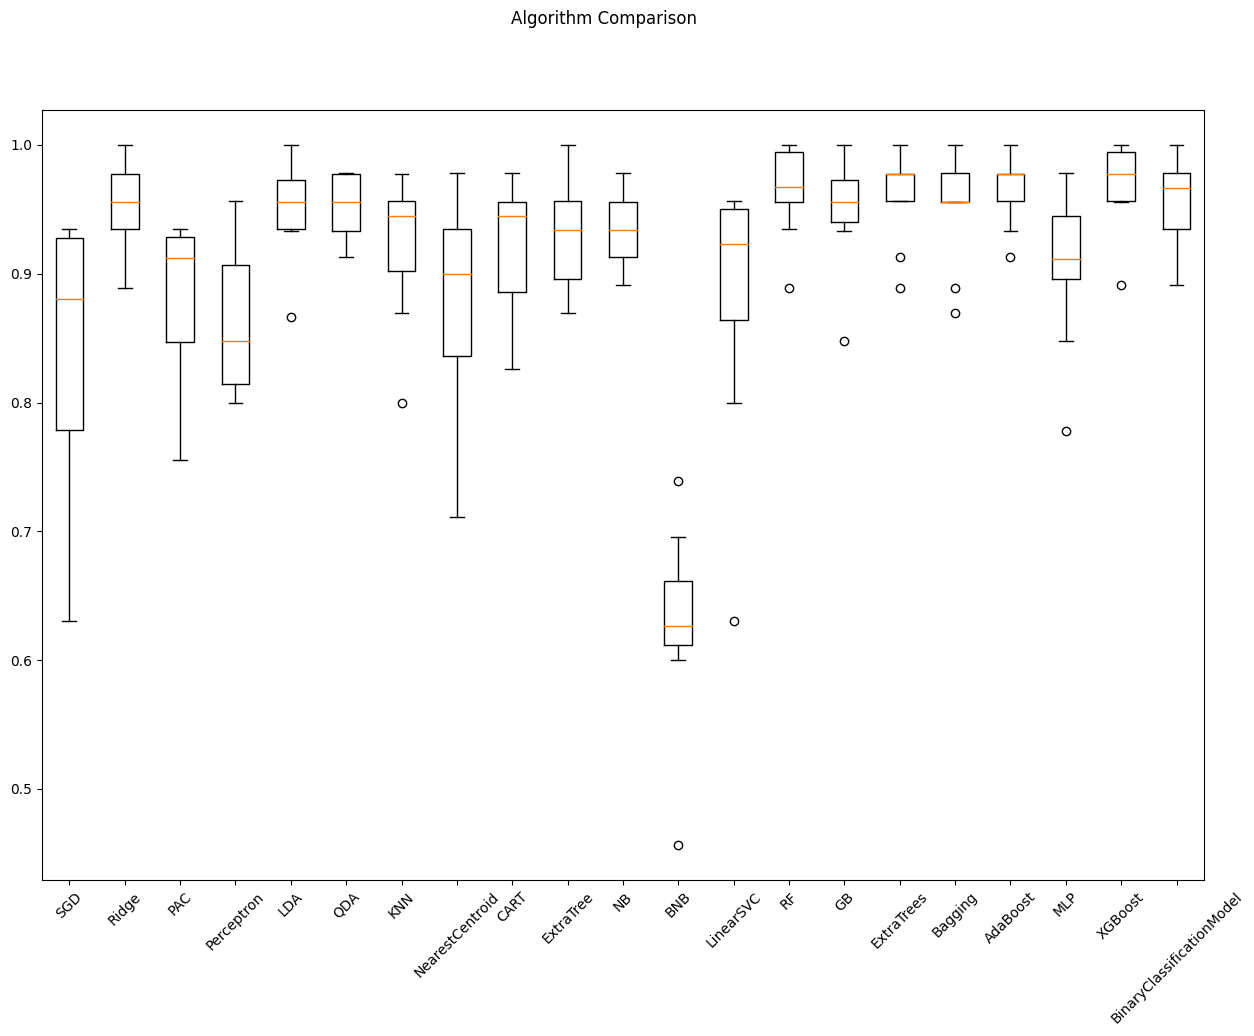

In [ ]:
fig = pyplot.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation=45)
pyplot.show()

In [ ]:
# Predict on the test set and calculate confusion matrix for each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print()


Confusion Matrix for SGD:
[[71  0]
 [10 33]]

Confusion Matrix for Ridge:
[[70  1]
 [ 4 39]]

Confusion Matrix for PAC:
[[69  2]
 [ 4 39]]

Confusion Matrix for Perceptron:
[[67  4]
 [ 2 41]]

Confusion Matrix for LDA:
[[70  1]
 [ 4 39]]

Confusion Matrix for QDA:
[[68  3]
 [ 2 41]]

Confusion Matrix for KNN:
[[71  0]
 [ 5 38]]

Confusion Matrix for NearestCentroid:
[[71  0]
 [ 7 36]]

Confusion Matrix for CART:
[[67  4]
 [ 4 39]]

Confusion Matrix for ExtraTree:
[[66  5]
 [ 2 41]]

Confusion Matrix for NB:
[[71  0]
 [ 3 40]]

Confusion Matrix for BNB:
[[71  0]
 [43  0]]

Confusion Matrix for LinearSVC:
[[71  0]
 [ 9 34]]



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix for RF:
[[70  1]
 [ 3 40]]

Confusion Matrix for GB:
[[69  2]
 [ 3 40]]

Confusion Matrix for ExtraTrees:
[[70  1]
 [ 2 41]]

Confusion Matrix for Bagging:
[[69  2]
 [ 3 40]]

Confusion Matrix for AdaBoost:
[[70  1]
 [ 2 41]]

Confusion Matrix for MLP:
[[71  0]
 [ 6 37]]

Confusion Matrix for XGBoost:
[[69  2]
 [ 3 40]]

Confusion Matrix for BinaryClassificationModel:
[[70  1]
 [ 4 39]]



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:17:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
